In [105]:
import pandas as pd

# Load CSV file
Dataset_Train = pd.read_csv('F:/UOC/Level 4/Machine learning/Data analysis project 2/Dataset_Train_Final.csv')
Dataset_Test = pd.read_csv('F:/UOC/Level 4/Machine learning/Data analysis project 2/Dataset_Test_Final.csv')

# Display first 5 rows
Dataset_Train.head()
Dataset_Test.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,Multivariate_Outlier
0,Male,No,42,Yes,Artist,8.0,Low,1.0,Cat_6,A,False
1,Male,Yes,43,Yes,Artist,2.0,Average,4.0,Cat_3,C,False
2,Female,Yes,59,No,Marketing,1.0,Average,4.0,Cat_1,D,False
3,Female,Yes,65,No,Engineer,1.0,Average,3.0,Cat_6,A,False
4,Female,No,69,Yes,Lawyer,1.0,Low,5.0,Cat_6,D,False


In [106]:
Dataset_Train = Dataset_Train.drop('Gender', axis=1)
Dataset_Test = Dataset_Test.drop('Gender', axis=1)

In [107]:
# Bin 'Age' into categories
age_bins = [0, 18, 35, 50, 65, 100]
age_labels = ['<18', '18-35', '36-50', '51-65', '65+']
Dataset_Train['Age_Binned'] = pd.cut(Dataset_Train['Age'], bins=age_bins, labels=age_labels, right=False)
Dataset_Test['Age_Binned'] = pd.cut(Dataset_Test['Age'], bins=age_bins, labels=age_labels, right=False)


In [108]:
Dataset_Train.head()


,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,Multivariate_Outlier,Age_Binned
0,No,36,Yes,Artist,0.0,Low,1.0,Cat_6,A,False,36-50
1,No,25,Yes,Doctor,6.0,Low,1.0,Cat_2,D,False,18-35
2,No,61,Yes,Artist,1.0,Low,1.0,Cat_6,B,False,51-65
3,No,33,Yes,Homemaker,1.0,Low,1.0,Cat_6,D,False,18-35
4,Yes,51,Yes,Engineer,1.0,Low,2.0,Cat_6,B,False,51-65


In [109]:
Dataset_Train = Dataset_Train.drop('Age', axis=1)
Dataset_Test = Dataset_Test.drop('Age', axis=1)

In [110]:
Dataset_Train.head()

,Ever_Married,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,Multivariate_Outlier,Age_Binned
0,No,Yes,Artist,0.0,Low,1.0,Cat_6,A,False,36-50
1,No,Yes,Doctor,6.0,Low,1.0,Cat_2,D,False,18-35
2,No,Yes,Artist,1.0,Low,1.0,Cat_6,B,False,51-65
3,No,Yes,Homemaker,1.0,Low,1.0,Cat_6,D,False,18-35
4,Yes,Yes,Engineer,1.0,Low,2.0,Cat_6,B,False,51-65


In [111]:
Dataset_Test.head()

,Ever_Married,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,Multivariate_Outlier,Age_Binned
0,No,Yes,Artist,8.0,Low,1.0,Cat_6,A,False,36-50
1,Yes,Yes,Artist,2.0,Average,4.0,Cat_3,C,False,36-50
2,Yes,No,Marketing,1.0,Average,4.0,Cat_1,D,False,51-65
3,Yes,No,Engineer,1.0,Average,3.0,Cat_6,A,False,65+
4,No,Yes,Lawyer,1.0,Low,5.0,Cat_6,D,False,65+


In [112]:
Dataset_Train.dtypes

Ever_Married              object
Graduated                 object
Profession                object
Work_Experience          float64
Spending_Score            object
Family_Size              float64
Var_1                     object
Segmentation              object
Multivariate_Outlier        bool
Age_Binned              category
dtype: object

In [113]:
# Convert object columns to category and bool columns to numeric (0/1) in both datasets
for df in [Dataset_Train, Dataset_Test]:
    obj_cols = df.select_dtypes(include='object').columns
    bool_cols = df.select_dtypes(include='bool').columns
    df[obj_cols] = df[obj_cols].astype('category')
    df[bool_cols] = df[bool_cols].astype('int')

In [114]:
# Step 1: View the frequency of each profession
profession_counts = Dataset_Train['Profession'].value_counts()
print(profession_counts)

# Step 2: Define a threshold - professions with less than this count will be grouped as 'Other'
threshold = 100  # You can adjust this threshold based on your dataset size

# Step 3: Create a list of professions to keep
common_professions = profession_counts[profession_counts >= threshold].index.tolist()

# Step 4: Apply transformation to both training and test datasets
def reduce_professions(df):
    df['Profession'] = df['Profession'].apply(lambda x: x if x in common_professions else 'Other')
    return df

# Apply to both datasets
Dataset_Train = reduce_professions(Dataset_Train)
Dataset_Test = reduce_professions(Dataset_Test)

# Optional: Re-check new distribution
print("\n🔹 Profession distribution after reduction:")
print(Dataset_Train['Profession'].value_counts())


Profession
Artist           2775
Healthcare       1402
Entertainment    1008
Engineer          741
Doctor            737
Lawyer            680
Executive         604
Marketing         323
Homemaker         255
Name: count, dtype: int64

🔹 Profession distribution after reduction:
Profession
Artist           2775
Healthcare       1402
Entertainment    1008
Engineer          741
Doctor            737
Lawyer            680
Executive         604
Marketing         323
Homemaker         255
Name: count, dtype: int64


In [115]:
Dataset_Train.dtypes, Dataset_Test.dtypes

(Ever_Married            category
 Graduated               category
 Profession              category
 Work_Experience          float64
 Spending_Score          category
 Family_Size              float64
 Var_1                   category
 Segmentation            category
 Multivariate_Outlier       int32
 Age_Binned              category
 dtype: object,
 Ever_Married            category
 Graduated               category
 Profession              category
 Work_Experience          float64
 Spending_Score          category
 Family_Size              float64
 Var_1                   category
 Segmentation            category
 Multivariate_Outlier       int32
 Age_Binned              category
 dtype: object)

🔹 Class Counts:
Segmentation
D    2406
A    2250
C    1947
B    1922
Name: count, dtype: int64

🔹 Class Percentages:
Segmentation
D    28.22
A    26.39
C    22.84
B    22.55
Name: proportion, dtype: float64


C:\Users\acer\AppData\Local\Temp\ipykernel_8800\3542477272.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Segmentation', data=Dataset_Train, palette='Set2')


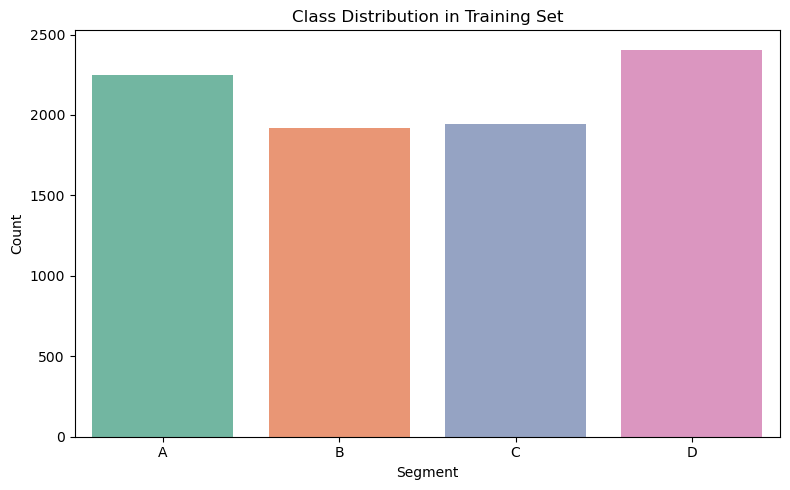

In [116]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of instances in each class
class_counts = Dataset_Train['Segmentation'].value_counts()
class_percentages = Dataset_Train['Segmentation'].value_counts(normalize=True) * 100

# Display results
print("🔹 Class Counts:")
print(class_counts)
print("\n🔹 Class Percentages:")
print(class_percentages.round(2))

# Plot class distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='Segmentation', data=Dataset_Train, palette='Set2')
plt.title("Class Distribution in Training Set")
plt.xlabel("Segment")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


In [117]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# Assuming your data is already loaded in Dataset_Train
X = Dataset_Train.drop(columns=['Segmentation'])
y = Dataset_Train['Segmentation']

# Split train/test if needed (optional)
# X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# 1. Identify column types
numeric_cols = X.select_dtypes(include=['number']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()

# 2. Preprocessor pipeline
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numeric_cols),
    ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols)
])

# 3. Fit preprocessor and transform features
X_processed = preprocessor.fit_transform(X)

# 4. Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_processed, y)

# 5. Optional: Check new class distribution
print("✅ Class distribution after SMOTE:")
print(pd.Series(y_resampled).value_counts())

# Now you can use X_resampled and y_resampled to train your models


✅ Class distribution after SMOTE:
Segmentation
A    2406
B    2406
C    2406
D    2406
Name: count, dtype: int64


Fitting models without multivariate outliers

In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.sparse as sparse

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# ✅ Step 1: Filter rows where Multivariate_Outlier == 0 but keep the column
Dataset_Train_filtered = Dataset_Train[Dataset_Train['Multivariate_Outlier'] == 0]
Dataset_Test_filtered = Dataset_Test[Dataset_Test['Multivariate_Outlier'] == 0]

# ✅ Step 2: Define target and features
target_col = 'Segmentation'

X_train = Dataset_Train_filtered.drop(columns=[target_col])
y_train = Dataset_Train_filtered[target_col]

X_test = Dataset_Test_filtered.drop(columns=[target_col])
y_test = Dataset_Test_filtered[target_col]

# ✅ Step 3: Identify column types
numeric_cols = X_train.select_dtypes(include='number').columns.tolist()
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

# ✅ Step 4: Preprocessing pipeline
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numeric_cols),
    ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols)
])

# ✅ Step 5: Define models
models = {
    'Logistic Regression': LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    'Naive Bayes': GaussianNB()
}

# ✅ Step 6: Fit and evaluate each model
for name, clf in models.items():
    print(f"\n🔹 {name}")

    if name == 'Naive Bayes':
        # Naive Bayes needs dense matrix input
        pipeline = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('to_dense', FunctionTransformer(lambda x: x.toarray() if sparse.issparse(x) else x, accept_sparse=True)),
            ('classifier', clf)
        ])
        pipeline.fit(X_train, y_train)
        y_train_pred = pipeline.predict(X_train)
        y_test_pred = pipeline.predict(X_test)

    elif name == 'XGBoost':
        # XGBoost requires label-encoded targets
        le = LabelEncoder()
        y_train_enc = le.fit_transform(y_train)
        y_test_enc = le.transform(y_test)

        pipeline = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('classifier', clf)
        ])
        pipeline.fit(X_train, y_train_enc)
        y_train_pred = le.inverse_transform(pipeline.predict(X_train))
        y_test_pred = le.inverse_transform(pipeline.predict(X_test))

    else:
        # Logistic Regression and Random Forest
        pipeline = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('classifier', clf)
        ])
        pipeline.fit(X_train, y_train)
        y_train_pred = pipeline.predict(X_train)
        y_test_pred = pipeline.predict(X_test)

    # ✅ Accuracy scores
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)

    print(f"✅ Train Accuracy: {train_acc:.4f}")
    print(f"✅ Test Accuracy:  {test_acc:.4f}")



🔹 Logistic Regression


c:\Users\acer\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


✅ Train Accuracy: 0.4761
✅ Test Accuracy:  0.4509

🔹 Random Forest
✅ Train Accuracy: 0.7115
✅ Test Accuracy:  0.4211

🔹 XGBoost


c:\Users\acer\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [04:49:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


✅ Train Accuracy: 0.6137
✅ Test Accuracy:  0.4433

🔹 Naive Bayes
✅ Train Accuracy: 0.4451
✅ Test Accuracy:  0.4120
